In [7]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import * 

Load the data files into the notebook

In [56]:
xtrain = np.loadtxt('Xtrain.csv') # load the training data
ytrain = np.loadtxt('Ytrain.csv') # load the training labels
xtest = np.loadtxt('Xtest.csv') # load the test data


# Q1)


### i)
- Number of training and test examples
- Number postive and negative examples in the training dataset

In [9]:
print('Number of training examples:',xtrain.shape[0]) #Number of training examples
print('Number of test examples',xtest.shape[0]) #Number of test examples

#Number of positve examples in training set
print(np.sum(ytrain==1),'positive examples in training set')
#Number of negative examples in training set
print(np.sum(ytrain==-1),'negative examples in training set')



Number of training examples: 3000
Number of test examples 3000
611 positive examples in training set
2389 negative examples in training set


- 3000 training examples
    - 611 positve examples
    - 2389 negative examples
- 3000 test examples

### Q1ii)


- 10 randomly selected negative and positive examples from training set
- Observations from the training set


10 random positive examples from the training set

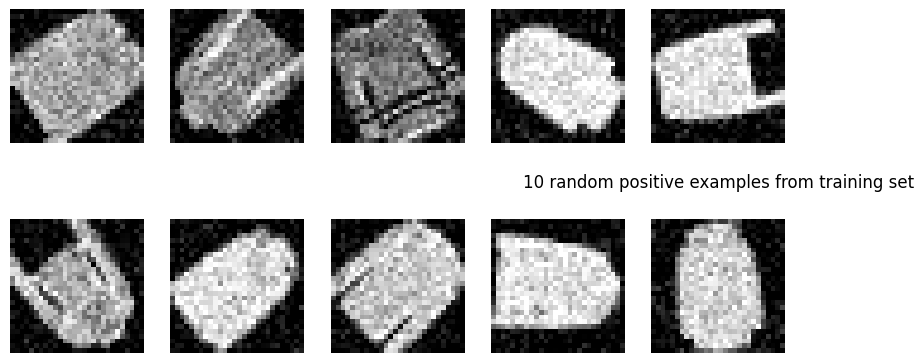

In [10]:
# #Plot 10 random positive examples from the training set 

#get the indices of the positive examples
positive_indices = np.where(ytrain==1)[0]

fig,axs = plt.subplots(2,5,figsize=(10,5))
for i in range(10):
    #choose a radom positive example
    ind = np.random.choice(positive_indices)

    axs[i//5,i%5].matshow(xtrain[ind].reshape(28,28),cmap='gray')
    axs[i//5,i%5].axis('off')

plt.title('10 random positive examples from training set')
plt.show()




10 random negative examples from training set

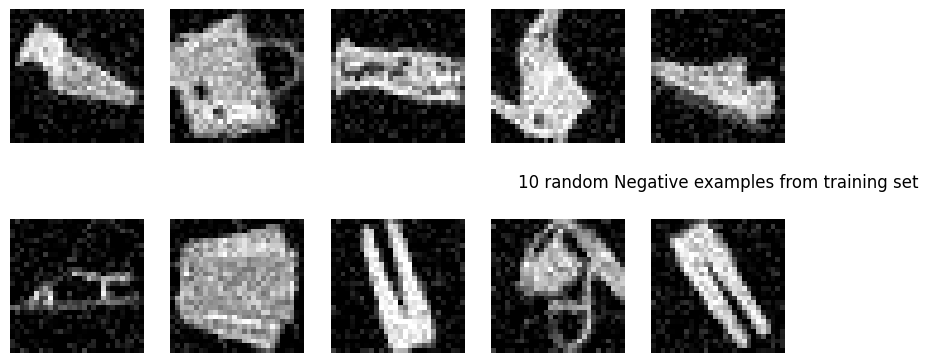

In [11]:
# #Plot 10 random negative examples from the training set 


#get the indices of the negative examples
negative_indices = np.where(ytrain==-1)[0]

fig,axs = plt.subplots(2,5,figsize=(10,5))
for i in range(10):
    #choose a radom positive example
    ind = np.random.choice(negative_indices)

    axs[i//5,i%5].matshow(xtrain[ind].reshape(28,28),cmap='gray')
    axs[i//5,i%5].axis('off')

plt.title('10 random Negative examples from training set')
plt.show()


##### Observations 
* Examples are grayscale images of what appears to be items of clothing
* Positive examples appear to be tops/jackets or more generally upperbody items of clothings
* Negative examples are all other items of clothing such as shoes and bags


Show 10 randomly selected objects from the test set


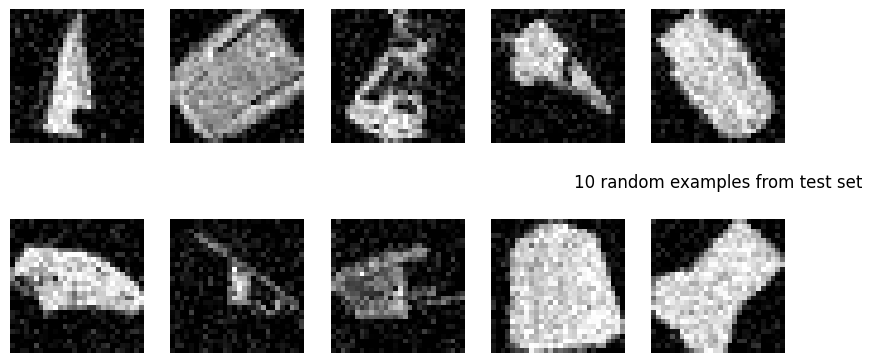

In [12]:
# #Plot 10 random examples from the test set 


fig,axs = plt.subplots(2,5,figsize=(10,5))
for i in range(10):
    #choose a radom positive example
    ind = np.random.choice(xtest.shape[0])

    axs[i//5,i%5].matshow(xtrain[ind].reshape(28,28),cmap='gray')
    axs[i//5,i%5].axis('off')

plt.title('10 random examples from test set')
plt.show()

##### Issues
* Some images are very pixelated may be difficult to generalise and idenitfy the item of clothing/fashion
* Skewed data set
* Approximately 20% of training data is positive and 80% negative
    * Large imbalance can effect the classifiers performance on unseen real world data
    * Might expect same distribution 
    * Biased towards predicting negative examples
    * The minority class(positive examples) harder to predict as there are fewer examples
    * A naive classifier assumes equal distribution of examples therefore would only learn the characteristics of the majority class (negative examples)

------

### Q1iii)

* Accuracy is a poor performance metric
    * The training examples are split 1:4 towards negative examples
    * Accuracy could still be high as the majority class is being correctly classified but the positive examples could still be largely misclassified
    ----
* ROC-AUC is an ok performance metric for this dataset
    * Imabalanced dataset with a large skew
    * TPR = TP/(TP+FN)
    * FPR = FP/(FP+TN)
        * Because we have small number of positive examples and many negative examples likely to get a small FPR which is misleading
    * ROC-AUC  can be misleading becase a small number of correct classifications or misclassifications can result in large changse to the ROC AUC score
    * However there are 611 positive examples which may be enough for the models to learn the features of the positive class
    ----
* PR-AUC good performance metric
    * For this dataset we are more interested in the positive class and it isthe minority class.
    * Focuses on minority class predictions therefore better indicator of the model for this dataset
    * Precision = TP/(TP+FP)
        * Precision tells us how accurately we can detect positive examples (how many positive examples were correctly classified as positve)
    * Recall = TP/(TP+FN)
        * Tells us the models ability to detect positive samples which is good when the positive examples are the minority class
    * Do not focus on TN only on the positve examples which is good for a severely skewed dataset with small number of positive examples like this one.
    ---
* F1-score is also a good metric
    * harmonic mean of both precision and recall for the minority positive class.
    * Get a high F1 score only if both precision and recall are large.


### Q1iv)

* Accuracy will be roughly 50%
* Roughly 50% will be classified positive
* Roughly 50% will be classified negative
    * Therefore half of the examples will be correctly classsed as positive and half will be incorrectly classified as positive
    * The same will be for negative examples
* accuracy = (1/4+1/4)/(4*1/4)


In [13]:
from sklearn import dummy

# use a random classifier to predict the labels of the test set

clf = dummy.DummyClassifier(strategy='uniform')
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)

print(f'The accuracy score is {accuracy_score(ytrain,ypred)}')


The accuracy score is 0.49333333333333335


### Q1iv)


* AUC-ROC and AUC-PR for a random classifier over the training dataset

In [14]:
# function calculates the AUC-ROC score and AUC-PR score for a classifier
def auc_proba(y,z):
    fpr,tpr,tt = roc_curve(y, z)
    roc_auc = auc(fpr,tpr) # compute the AUC-ROC score
    pr_auc = average_precision_score(y, z) # compute the AUC-PR score
    return roc_auc,pr_auc


In [15]:
# compute the AUC-ROC score and AUC-PR score for the training set
z = clf.predict_proba(xtrain)[:,1]  # get the probability of the positive class
roc_auc,pr_auc = auc_proba(ytrain,z)

print(f'The AUC-ROC score over the training set is {roc_auc}')
print(f'The AUC-PR score over the training set is {pr_auc}')



The AUC-ROC score over the training set is 0.5
The AUC-PR score over the training set is 0.20366666666666666


* AUC-ROC and AUC-PR for a random classifier over the test dataset

In [16]:
# compute the AUC-ROC score and AUC-PR score for the test set
z = clf.predict_proba(xtest)[:,1]

roc_auc,pr_auc = auc_proba(ypred,z)
print(f'The AUC-ROC score over the test set is {roc_auc}')
print(f'The AUC-PR score over the test set is {pr_auc}')

The AUC-ROC score over the test set is 0.5
The AUC-PR score over the test set is 0.507


#### Training set results
* AUC-ROC score is 0.5
    * Which is as expected for a random classifier as the classifier is randomly guessing the labels. Therefore we expect roughly an equal number of TPs and FPs
* AUC-PR score is roughly 0.2
    * This is the fraction of examples that are positive which is what the PR score represents
    * 611/300 = 0.28



## Test Set results
* AUC-ROC is 0.5 
* AUC-PR is roughly 0.5 as we predicted roughly half as positve and half as negative with the random classifier

## Q2

### Q2i)
### 5 fold stratified cross-valiadtion with 3 NN

In [17]:
df1 = pd.DataFrame(columns=['accuracy','balanced accuracy','AUC-ROC','AUC-PR'],index=range(5))

In [18]:
def plotROC(z,y,pstr=''):
    fpr,tpr,tt = roc_curve(y, z)# compute the ROC curve
    roc_auc = auc(fpr, tpr)# compute the AUC-ROC score
    plt.figure()
    plt.plot(fpr,tpr,'o-');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.title('ROC '+pstr+' AUC: '+str(roc_auc))
    return roc_auc

def plotPRC(z,y,pstr=''):
    P,R,tt = precision_recall_curve(y, z)# compute the PRC curve
    pr_auc = average_precision_score(y, z)# compute the AUC-PR score
    plt.figure()
    plt.plot(R,P,'o-');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid();plt.title('PRC '+pstr+' AUC: '+str(pr_auc))
    return pr_auc

,accuracy,balanced accuracy,AUC-ROC,AUC-PR
0,0.878333,0.810704,0.891068,0.689491
1,0.868333,0.798323,0.872548,0.616642
2,0.865,0.796231,0.899899,0.655449
3,0.88,0.79954,0.891359,0.683542
4,0.855,0.770031,0.859973,0.575249
Mean,0.869333,0.794966,0.882969,0.644075
Standard deviation,0.010247,0.015027,0.016279,0.04806


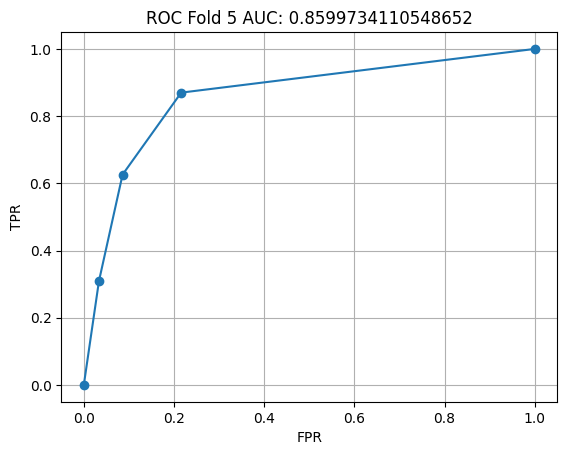

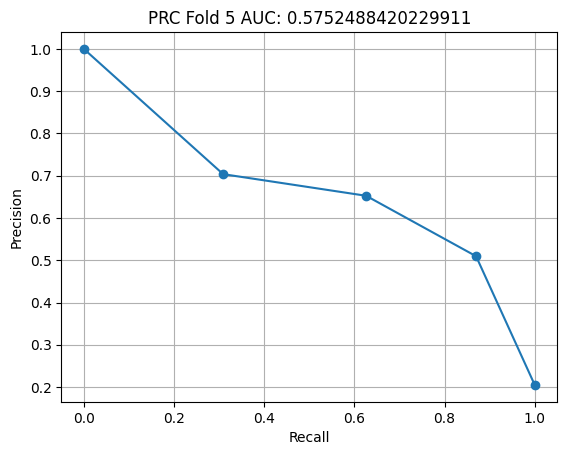

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier as nbrs

clf = nbrs(n_neighbors=3)# use 3 nearest neighbors
skf = StratifiedKFold(n_splits=5,shuffle = True,random_state=42)# use 5-fold cross validation


for i,(tr_idx,v_idx) in enumerate(skf.split(xtrain,ytrain)):
    xtr,xv = xtrain[tr_idx],xtrain[v_idx]# get the training and validation sets
    ytr,yv = ytrain[tr_idx],ytrain[v_idx]# get the training and validation labels
    clf.fit(xtr,ytr)
    ypred = clf.predict(xv)
    z = clf.predict_proba(xv)[:,1]  # get the probability of the positive class
    if i == 4:
        roc_auc = plotROC(z,yv,'Fold '+str(i+1))
        pr_auc = plotPRC(z,yv,'Fold '+str(i+1))
    else:
        roc_auc,pr_auc = auc_proba(yv,z)

    # store the performance metrics for each fold
    df1.loc[i].accuracy = accuracy_score(yv,ypred)
    df1.loc[i]['balanced accuracy'] = balanced_accuracy_score(yv,ypred)
    df1.loc[i]['AUC-ROC'] = roc_auc
    df1.loc[i]['AUC-PR'] = pr_auc

df1.style.set_caption("Performance metrics for each fold")

avg = (df1.mean())
stdev = (df1.std())


df1.loc['Mean'] = avg
df1.loc['Standard deviation'] = stdev

df1


## Q2ii) Is the graphs from above
* The AUC-ROC is 0.86 which indicates the nearest neighbour classifier is doing well at distinguishing between positive and negative examples however this could also be because it is just predicting the negative class which accounts for around 80% of the data accurately.
* The AUC-PR is 0.58 which would support the last statement as it means that the classifier is acting almost randomly and is not able to distinguish between the classes very well


## Q2iii) Preprocessing and effects

In [20]:
# import preprocessing functions
from sklearn.preprocessing import *
from sklearn import pipeline

clf = nbrs(n_neighbors=3)
skf = StratifiedKFold(n_splits=5,shuffle = True,random_state=42)

# dataframe for standard scaler
df2 = pd.DataFrame(columns=['accuracy','balanced accuracy','AUC-ROC','AUC-PR'],index=range(5))
# dataframe for min-max scaler
df3 = pd.DataFrame(columns=['accuracy','balanced accuracy','AUC-ROC','AUC-PR'],index=range(5))

In [21]:
# Create a pipeline with standard scaler and 3 KNN classifier
pipe_standard_scaler = pipeline.Pipeline([('norm1',StandardScaler()),('clf',clf)])

for i,(tr_idx,v_idx) in enumerate(skf.split(xtrain,ytrain)):
    xtr,xv = xtrain[tr_idx],xtrain[v_idx]
    ytr,yv = ytrain[tr_idx],ytrain[v_idx]
    
    # fit the training data to the standard scaler pipeline and then test it on the validation set
    pipe_standard_scaler.fit(xtr,ytr)
    ypred_standard_scaler = pipe_standard_scaler.predict(xv)
    z = pipe_standard_scaler.predict_proba(xv)[:,1]  # get the probability of the positive class    
    roc_auc,pr_auc = auc_proba(yv,z)

    df2.loc[i] = {'accuracy': accuracy_score(yv,ypred_standard_scaler) ,'balanced accuracy': balanced_accuracy_score(yv,ypred_standard_scaler),'AUC-ROC': roc_auc,'AUC-PR': pr_auc}
    
avg_standard_scaler = (df2.mean())
stdev_standard_scaler = (df2.std())

df2.loc['Mean'] = avg_standard_scaler
df2.loc['Standard Deviation'] = stdev_standard_scaler

In [22]:
df2 # performance metrics for standard scaler

,accuracy,balanced accuracy,AUC-ROC,AUC-PR
0,0.866667,0.78812,0.869813,0.6491
1,0.88,0.808697,0.880976,0.631987
2,0.88,0.823959,0.887209,0.651822
3,0.878333,0.789337,0.879904,0.674565
4,0.863333,0.784323,0.871521,0.598003
Mean,0.873667,0.798887,0.877885,0.641095
Standard Deviation,0.008028,0.016912,0.007181,0.028457


In [23]:
# Create a pipeline with min-max scaler and 3 KNN classifier
pipe_minmax_scaler = pipeline.Pipeline([('norm1',MinMaxScaler( )),('clf',clf)])

for i,(tr_idx,v_idx) in enumerate(skf.split(xtrain,ytrain)):
    xtr,xv = xtrain[tr_idx],xtrain[v_idx]
    ytr,yv = ytrain[tr_idx],ytrain[v_idx]
    
    # fit the training data to the standard scaler pipeline and then test it on the validation set
    pipe_standard_scaler.fit(xtr,ytr)
    ypred_standard_scaler = pipe_standard_scaler.predict(xv)
    
    # fit the training data to the min-max scaler pipeline and then test it on the validation set
    pipe_standard_scaler.fit(xtr,ytr)
    ypred_min_max = pipe_standard_scaler.predict(xv)
    
    z  = pipe_standard_scaler.predict_proba(xv)[:,1]  # get the probability of the positive class

    roc_auc,pr_auc = auc_proba(yv,z)


    df3.loc[i] = {'accuracy': accuracy_score(yv,ypred_min_max) ,'balanced accuracy': balanced_accuracy_score(yv,ypred_min_max),'AUC-ROC': roc_auc,'AUC-PR': pr_auc}



avg_min_max = (df3.mean())
stdev_min_max = (df3.std())

df3.loc['Mean'] = avg_min_max
df3.loc['Standard Deviation'] = stdev_min_max



In [24]:
df3 # Min-max scaler

,accuracy,balanced accuracy,AUC-ROC,AUC-PR
0,0.866667,0.78812,0.869813,0.6491
1,0.88,0.808697,0.880976,0.631987
2,0.88,0.823959,0.887209,0.651822
3,0.878333,0.789337,0.879904,0.674565
4,0.863333,0.784323,0.871521,0.598003
Mean,0.873667,0.798887,0.877885,0.641095
Standard Deviation,0.008028,0.016912,0.007181,0.028457


In [25]:
df1 # performance metrics for 3 KNN classifier no scaling

,accuracy,balanced accuracy,AUC-ROC,AUC-PR
0,0.878333,0.810704,0.891068,0.689491
1,0.868333,0.798323,0.872548,0.616642
2,0.865,0.796231,0.899899,0.655449
3,0.88,0.79954,0.891359,0.683542
4,0.855,0.770031,0.859973,0.575249
Mean,0.869333,0.794966,0.882969,0.644075
Standard deviation,0.010247,0.015027,0.016279,0.04806


### observations
* Get a higher accuracy and balanced accuracy but the AUC-ROC and AUC-PR scores are roughly the same

# Q3
* Strategy
    * use  Perceptron, Naïve Bayes Classifier, Linear SVM and Kernelized[ poly,sigmoid,rbf] SVM to fit the data 
    * Tune the hyperparameters using grid search
    * return a list of the best parameters and average accuracy, mean balanced acurracy,mean AUC-ROC and mean AUC-PR

In [26]:
# import linear mode
from sklearn import linear_model
# import gridsearchcv
from sklearn.model_selection import GridSearchCV

#import svm and naive bayes
from sklearn import svm,naive_bayes
import warnings
warnings.filterwarnings('ignore')

In [351]:
 # perform a grid search which returns the mean and standard deviation of accuracy, balanced accuracy, AUC-ROC and AUC-PR across folds
def grid_search(grid,clf):
    # define the stratisfied k-fold cross validation
    skf = StratifiedKFold(n_splits=5,shuffle = True,random_state=42)
    pipe_standard_scaler = pipeline.Pipeline([('norm1',StandardScaler()),('clf',clf)])

    # define the grid search
    search = GridSearchCV(pipe_standard_scaler, grid, cv=skf,scoring = ['accuracy','balanced_accuracy','roc_auc','average_precision'],refit = 'average_precision',return_train_score=True)
    # perform the search
    results = search.fit(xtrain, ytrain)
    # get the best parameters
    best_params = results.best_params_
    # get the best estimator
    best_estimator = results.best_estimator_
    # get the mean and standard deviation of accuracy, balanced accuracy, AUC-ROC and AUC-PR across folds
    mean = [results.cv_results_['mean_test_accuracy'],results.cv_results_['mean_test_balanced_accuracy'],results.cv_results_['mean_test_roc_auc'],results.cv_results_['mean_test_average_precision']]
    std = [results.cv_results_['std_test_accuracy'],results.cv_results_['std_test_balanced_accuracy'],results.cv_results_['std_test_roc_auc'],results.cv_results_['std_test_average_precision']]


    return mean,std,best_params,best_estimator

Running gridsearch with perceptron

In [352]:
perceptron = linear_model.Perceptron()
# define the stratisfied k-fold cross validation
# different learning rates to test
param = {'clf__eta0':[0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 5.0, 10.0],
        'clf__max_iter': [10, 100, 1000,10000]}

means,stds,best_params,best_estimator  = grid_search(param,perceptron)
dfclassifiers = pd.DataFrame(columns=['accuracy','balanced accuracy','AUC-ROC','AUC-PR','best_params','best_estimator'],index=['Perceptron','Naive Bayes','Linear SVM','Polynomial SVM','Rbf SVM','Sigmoid SVM'])

dfclassifiers.loc['Perceptron'] = {'accuracy': means[0][0],'balanced accuracy': means[1][0],'AUC-ROC': means[2][0],'AUC-PR': means[3][0],'best_params': best_params,'best_estimator': best_estimator}

Naive Bayes

In [353]:
n_bayes = naive_bayes.GaussianNB()

params = {'clf__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000, 100000, 1000000]}
means,stds,best_params,best_estimator  = grid_search(params,n_bayes)
dfclassifiers.loc['Naive Bayes'] = {'accuracy': means[0][0],'balanced accuracy': means[1][0],'AUC-ROC': means[2][0],'AUC-PR': means[3][0],'best_params': best_params,'best_estimator': best_estimator}
    

Linear SVM

In [354]:
linear_svm = svm.SVC(kernel='linear')
params = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
means,stds,best_params,best_estimator  = grid_search(params,linear_svm)
dfclassifiers.loc['Linear SVM'] = {'accuracy': means[0][0],'balanced accuracy': means[1][0],'AUC-ROC': means[2][0],'AUC-PR': means[3][0],'best_params': best_params,'best_estimator': best_estimator}

# kernalised SVM

#### Did each kernel separately to get all the results for each kernel

In [355]:
clf = svm.SVC(kernel='poly')

params = {'clf__C': [0.1, 1],'clf__coef0':[0.1,1.0,10.0],'clf__degree':[1,2,3,4]}
means,stds,best_params,best_estimator  = grid_search(params,clf)
dfclassifiers.loc['Polynomial SVM'] = {'accuracy': means[0][0],'balanced accuracy': means[1][0],'AUC-ROC': means[2][0],'AUC-PR': means[3][0],'best_params': best_params,'best_estimator': best_estimator}


In [356]:
clf = svm.SVC(kernel='rbf')

params = {'clf__C': [0.1, 1, 10, 100, 1000],'clf__gamma': ['auto']}
means,stds,best_params,best_estimator  = grid_search(params,clf)
dfclassifiers.loc['Rbf SVM'] = {'accuracy': means[0][0],'balanced accuracy': means[1][0],'AUC-ROC': means[2][0],'AUC-PR': means[3][0],'best_params': best_params,'best_estimator': best_estimator}

In [357]:
clf = svm.SVC(kernel='sigmoid')

params = {'clf__C': [0.1,1,10, 100],'clf__coef0':[0.01,0.1,1.0,10.0]}
means,stds,best_params,best_estimator  = grid_search(params,clf)
dfclassifiers.loc['Sigmoid SVM'] = {'accuracy': means[0][0],'balanced accuracy': means[1][0],'AUC-ROC': means[2][0],'AUC-PR': means[3][0],'best_params': best_params,'best_estimator': best_estimator}

In [358]:
dfclassifiers

,accuracy,balanced accuracy,AUC-ROC,AUC-PR,best_params,best_estimator
Perceptron,0.807,0.70225,0.804006,0.561118,"{'clf__eta0': 0.001, 'clf__max_iter': 10}","(StandardScaler(), Perceptron(eta0=0.001, max_..."
Naive Bayes,0.755333,0.749586,0.78041,0.427916,{'clf__var_smoothing': 1000},"(StandardScaler(), GaussianNB(var_smoothing=10..."
Linear SVM,0.864,0.745957,0.882105,0.698179,{'clf__C': 0.001},"(StandardScaler(), SVC(C=0.001, kernel='linear'))"
Polynomial SVM,0.841,0.635229,0.871544,0.680787,"{'clf__C': 100, 'clf__coef0': 0.1, 'clf__degre...","(StandardScaler(), SVC(C=100, coef0=0.1, degre..."
Rbf SVM,0.796667,0.501416,0.903338,0.686056,"{'clf__C': 10, 'clf__gamma': 'auto'}","(StandardScaler(), SVC(C=10, gamma='auto'))"
Sigmoid SVM,0.807,0.532226,0.854828,0.627035,"{'clf__C': 0.1, 'clf__coef0': 0.01}","(StandardScaler(), SVC(C=0.1, coef0=0.01, kern..."


The table shows the average accuracy,balanced accuracy,AUC-ROC and AUC-PR scores for each of the classification models along with the best parameters
The best estimator is included so it is easier to reuse the model

## Now that we have the best parameters for each type of classifier we can use 5-stratified CV and plot the ROC curves

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


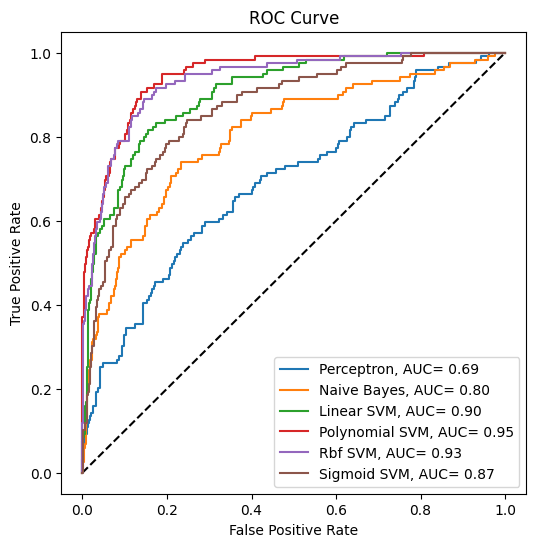

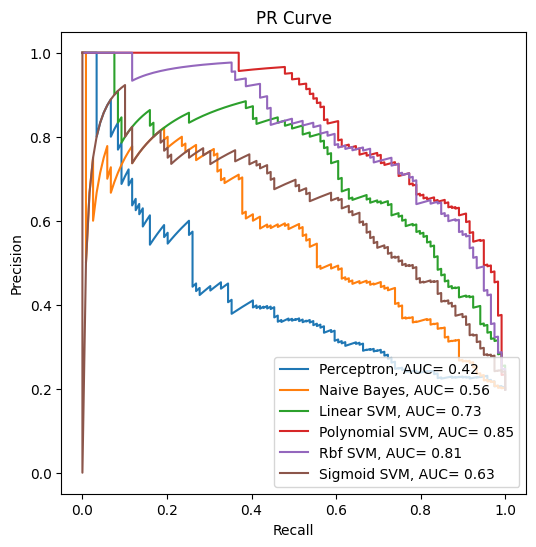

In [359]:
# get a list of all the classifiers tested above and iterate through them
from sklearn.model_selection import train_test_split


clfs = dfclassifiers.index

clf_enum = enumerate(dfclassifiers.index)

#split the data into training and validation sets
xtr, xtt, ytr, ytt = train_test_split(xtrain,ytrain,test_size=0.2,random_state=42)


precision_scores = []
recall_scores = []
thresholds = []
aucs = []

plt.figure(1,figsize=(6,6))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.plot([0,1],[0,1],'k--')


plt.figure(2,figsize=(6,6))
plt.title('PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(loc='lower right')




for i in clf_enum:
    clf = dfclassifiers.loc[i[1]]['best_estimator']
    clf.fit(xtr,ytr)
    try:
        z = clf.decision_function(xtt)
    except AttributeError:
        z = clf.predict_proba(xtt)[:,1]       
    fpr,tpr,tt = roc_curve(ytt,z)
    auc = roc_auc_score(ytt,z)

    precision,recall,thresh_pr = precision_recall_curve(ytt,z)
    precision_scores.append(precision)
    recall_scores.append(recall)
    thresholds.append(thresh_pr)
    pr_auc = average_precision_score(ytt,z)
    aucs.append(pr_auc)

    # plot the ROC curve on a separate plot
    plt.figure(1)
    plt.plot(fpr,tpr,label= f"{i[1]}, AUC= {auc:.2f}")
    # plot the PR curve on a separate plot
    plt.figure(2)
    plt.plot(recall,precision,label= f"{i[1]}, AUC= {pr_auc:.2f}")



plt.figure(1)
plt.legend(loc='lower right')
plt.figure(2)
plt.legend(loc='lower right')

plt.show()
          

# q3v)
#### Observations
##### ROC Curve
* The rbf and Polynomial kernel have the highest AUC scores and that they are predicting the negative class with the accuracy out of all the other kernels
* The perceptron is the simplest model and the ROC curve shows the poor performance model as it behaves worser than a random classifier and has not been able to discriminate the classes.
##### PR Curve
* Similar pattern as Polynomial and rbf svm have the highest average precision scores therefore they are doing well at predicting the positive minority class which is what we are interested in


# Q4

## Q4i)

In [29]:
scaler = MinMaxScaler()
from sklearn.decomposition import PCA

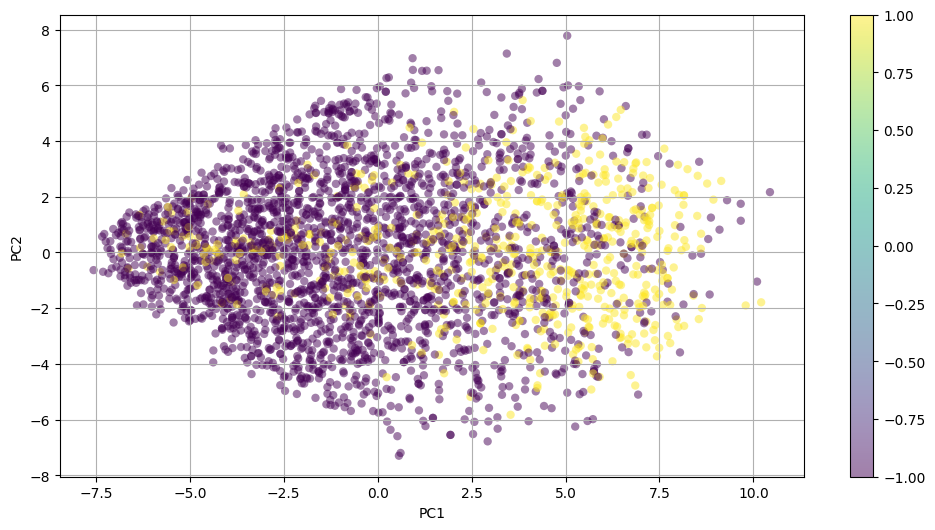

In [360]:
data_rescaled = scaler.fit_transform(xtrain)
pca = PCA(n_components=2)
pca.fit(data_rescaled)
xtrain_pca = pca.transform(data_rescaled)
plt.scatter(xtrain_pca[:,0],xtrain_pca[:,1],c=ytrain, edgecolor='none', alpha=0.5)
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()


## Observations
* The data is not linearly seperable in 2 principal components. 
* There is no clear boundary in the current feature space that can seperate the 2 classes

## Q4ii)

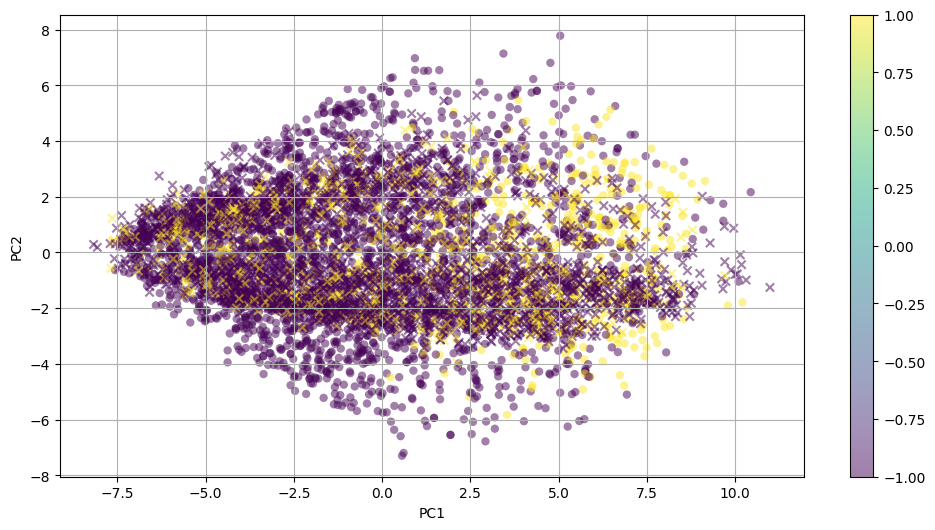

In [361]:

data_rescaled = scaler.fit_transform(xtrain)
test_rescaled = scaler.transform(xtest)
pca = PCA(n_components=2)
pca.fit(data_rescaled)
xtrain_pca = pca.transform(data_rescaled)
xtest_pca = pca.transform(test_rescaled)
plt.scatter(xtrain_pca[:,0],xtrain_pca[:,1],c=ytrain, edgecolor='none', alpha=0.5)  
plt.scatter(xtest_pca[:,0],xtest_pca[:,1],c=ytrain, edgecolor='none', alpha=0.5,marker='x')
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()


## Observations

# Q4iii)

326


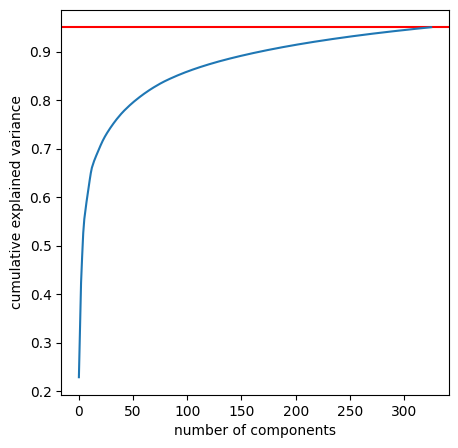

In [362]:
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)
# print the number of components
print(pca.n_components_)

# plot a scree plot
plt.figure(figsize=(5,5))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()





## Observations
The red line shows y=0.95, so for 95% explained variance we are looking at around 310-320 principal components
Sklearn calculations returns 326 principal components

In [31]:
data_rescaled = scaler.fit_transform(xtrain)
pca = PCA(n_components=0.95)
pca.fit(data_rescaled)
xtrain_pca = pca.transform(data_rescaled)

In [32]:
 # perform a grid search which returns the mean and standard deviation of accuracy, balanced accuracy, AUC-ROC and AUC-PR across folds
def grid_search_pca(grid,clf):
    # define the pipeline with a min-max scaler and a classifier
    pipe = pipeline.Pipeline([("clf", clf)])

    # define the grid search
    search = GridSearchCV(pipe, grid, cv=5,scoring = ['accuracy','balanced_accuracy','roc_auc','average_precision'],refit = 'average_precision',return_train_score=True)
    # perform the search
    results = search.fit(xtrain_pca, ytrain)
    # get the best parameters
    best_params = results.best_params_
    # get the best estimator
    best_estimator = results.best_estimator_
    # get the mean and standard deviation of accuracy, balanced accuracy, AUC-ROC and AUC-PR across folds
    mean = [results.cv_results_['mean_test_accuracy'],results.cv_results_['mean_test_balanced_accuracy'],results.cv_results_['mean_test_roc_auc'],results.cv_results_['mean_test_average_precision']]
    std = [results.cv_results_['std_test_accuracy'],results.cv_results_['std_test_balanced_accuracy'],results.cv_results_['std_test_roc_auc'],results.cv_results_['std_test_average_precision']]


    return mean,std,best_params,best_estimator

In [35]:
dfPCA = pd.DataFrame(columns=['accuracy','balanced accuracy','AUC-ROC','AUC-PR','best_params','best_estimator'],index=['Linear','Poly','Rbf','Sigmoid'])

In [37]:
# Use grid search function to find the best parameters for the classifiers
clf = svm.SVC(kernel='linear')
params = {'clf__C': [0.1, 1, 10, 100]}

means,stds,best_params,best_estimator  = grid_search_pca(params,clf)

dfPCA.loc['Linear'] = {'accuracy': means[0][0],'balanced accuracy': means[1][0],'AUC-ROC': means[2][0],'AUC-PR': means[3][0],'best_params': best_params,'best_estimator': best_estimator}


In [38]:
clf = svm.SVC(kernel='poly')
params = {'clf__C': [0.1, 1, 10],'clf__degree': [3,4,5],'clf__coef0':[0.1,1.0,10.0]}
means,stds,best_params,best_estimator  = grid_search_pca(params,clf)

dfPCA.loc['Poly'] = {'accuracy': means[0][0],'balanced accuracy': means[1][0],'AUC-ROC': means[2][0],'AUC-PR': means[3][0],'best_params': best_params,'best_estimator': best_estimator}


In [40]:
clf = svm.SVC(kernel='sigmoid')
params = {'clf__C': [0.1, 1, 10, 100],'clf__degree': [2,3,4,5]}
means,stds,best_params,best_estimator  = grid_search_pca(params,clf)

dfPCA.loc['Sigmoid'] = {'accuracy': means[0][0],'balanced accuracy': means[1][0],'AUC-ROC': means[2][0],'AUC-PR': means[3][0],'best_params': best_params,'best_estimator': best_estimator}


In [41]:
clf = svm.SVC(kernel='rbf')

params = {'clf__C': [0.1, 1, 10, 100],'clf__gamma': ['auto']}
means,stds,best_params,best_estimator  = grid_search_pca(params,clf)

dfPCA.loc['Rbf'] = {'accuracy': means[0][0],'balanced accuracy': means[1][0],'AUC-ROC': means[2][0],'AUC-PR': means[3][0],'best_params': best_params,'best_estimator': best_estimator}


In [42]:
dfPCA

,accuracy,balanced accuracy,AUC-ROC,AUC-PR,best_params,best_estimator
Linear,0.858,0.740305,0.862709,0.663809,{'clf__C': 0.1},"(SVC(C=0.1, kernel='linear'))"
Poly,0.845,0.661486,0.901058,0.6783,"{'clf__C': 0.1, 'clf__coef0': 1.0, 'clf__degre...","(SVC(C=0.1, coef0=1.0, degree=5, kernel='poly'))"
Rbf,0.796333,0.5,0.90023,0.693741,"{'clf__C': 10, 'clf__gamma': 'auto'}","(SVC(C=10, gamma='auto'))"
Sigmoid,0.819,0.570808,0.844881,0.60266,"{'clf__C': 0.1, 'clf__degree': 2}","(SVC(C=0.1, degree=2, kernel='sigmoid'))"


# Q5) Develop an optimal pipline

In [44]:

clf =dfPCA.loc['Poly']['best_estimator']
n_cpts = 0.95

# create a pipeline with optimal parameters

pipe = pipeline.Pipeline([("scale", MinMaxScaler()), ("PCA", PCA(n_components=n_cpts)),("clf", clf)])

pipe.fit(xtrain,ytrain) # fit the pipeline to the training data
y_pred = pipe.predict(xtest) # predict the test data

# output to csv
df = pd.DataFrame(y_pred)
df.to_csv('u1839856.csv',index=False,header=False)
